# Vector autorregression (VAR)

**Definition**

> **Vector Autoregression (VAR)** is a forecasting algorithm that can be used when two or more time series influence each other. **VAR** is a multivariate forecasting algorithm that is used when two or more time series influence each other.

That means, the basic requirements in order to use VAR are:

You need at least two time series (variables)
The time series should influence each other.
Alright. So why is it called ‘Autoregressive’?

It is considered as an Autoregressive model because, each variable (Time Series) is modeled as a function of the past values, that is the predictors are nothing but the lags (time delayed value) of the series.

Ok, so how is VAR different from other Autoregressive models like AR, ARMA or ARIMA?

The primary difference is those models are uni-directional, where, the predictors influence the Y and not vice-versa. Whereas, Vector Auto Regression (VAR) is bi-directional. That is, the variables influence each other.
We will go more in detail in the next section.

In this article you will gain a clear understanding of:

* Intuition behind VAR Model formula

* How to check the bi-directional relationship using Granger Causality

* Procedure to building a VAR model in Python

* How to determine the right order of VAR model

* Interpreting the results of VAR model

* How to generate forecasts to original scale of time series

## Rationale: $AR(p)$ and $VAR(p)$

In autoregression (AR) models, the time series is modeled as a linear combination of it’s own lags. That is, the past values of the series are used to forecast the current and future.

A typical $AR(p)$ model equation looks something like this:

> $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \cdots \alpha_p Y_{t-p} + \varepsilon_t$

where $\alpha_0$ is the intercept, a constant and $\alpha_1$, $\alpha_2$ till $\alpha_p$ are the coefficients of the lags of $Y$ till order $p$.

Order ‘p’ means, up to p-lags of Y is used and they are the predictors in the equation. The ε_{t} is the error, which is considered as white noise.

Alright. So, how does a VAR model’s formula look like?

In the VAR model, each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. Since you have multiple time series that influence each other, it is modeled as a system of equations with one equation per variable (time series).
That is, if you have 5 time series that influence each other, we will have a system of 5 equations.

Well, how is the equation exactly framed?

## 1. **$VAR(1)$ model**

Let’s suppose, you have two variables (Time series) $Y1$ and $Y2$, and you need to forecast the values of these variables at time $(t)$.

To calculate $Y1(t)$, VAR will use the past values of both $Y1$ as well as $Y2$. Likewise, to compute $Y2(t)$, the past values of both $Y1$ and $Y2$ be used.

For example, the system of equations for a $VAR(1)$ model with two time series (variables $Y1$ and $Y2$) is as follows:

> $Y_{1,t} = \alpha_{1,0} + \alpha_{11,1} Y_{1,t-1} + \alpha_{12,1} Y_{2,t-1} + \varepsilon_{1,t}$

> $Y_{2,t} = \alpha_{2,0} + \alpha_{21,1} Y_{1,t-1} + \alpha_{22,1} Y_{2,t-1} + \varepsilon_{2,t}$

Where, $Y_{1,t-1}$ and $Y_{2,t-1}$ are the first lag of time series $Y1$ and $Y2$ respectively.

The above equation is referred to as a $VAR(1)$ model, because, each equation is of order 1, that is, it contains up to one lag of each of the predictors ($Y1$ and $Y2$).

Since the $Y$ terms in the equations are interrelated, the Y’s are considered as endogenous variables, rather than as exogenous predictors.

## 2. $VAR(2)$ model

Likewise, the second order $VAR(2)$ model for two variables would include up to two lags for each variable ($Y1$ and $Y2$).

> $Y_{1,t} = \alpha_{1,0} + \alpha_{11,1} Y_{1,t-1} + \alpha_{12,1} Y_{2,t-1} + \alpha_{11,2} Y_{1,t-2} + \alpha_{12,2} Y_{2,t-2}  + \varepsilon_{1,t}$

> $Y_{2,t} = \alpha_{2,0} + \alpha_{21,1} Y_{1,t-1} + \alpha_{22,1} Y_{2,t-1} + \alpha_{21,2} Y_{1,t-2} + \alpha_{22,2} Y_{2,t-2} + \varepsilon_{2,t}$

> Can you imagine what a second order $VAR(2)$ model with three variables ($Y1$, $Y2$ and $Y3$) would look like?

**As you increase the number of time series (variables) in the model the system of equations become larger.**

## 2. VAR modelling

The procedure to build a VAR model involves the following steps:

1. Analyze the time series characteristics

2. Test for causation amongst the time series

3. Test for stationarity

4. Transform the series to make it stationary, if needed

5. Find optimal order (p)

6. Prepare training and test datasets

7. Train the model

8. Roll back the transformations, if any.

9. Evaluate the model using test set

10. Forecast to future

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

For this article let’s use the time series used in:

> Yash P Mehra (1994) “Wage Growth and the Inflation Process: An Empirical Approach” [Link](https://link.springer.com/chapter/10.1007/978-1-349-23529-2_5).

This dataset has the following 8 quarterly time series:

1. `rgnp`  : Real GNP.

2. `pgnp`  : Potential real GNP.

3. `ulc`   : Unit labor cost.

4. `gdfco` : Fixed weight deflator for personal consumption expenditure excluding food and energy.

5. `gdf`   : Fixed weight GNP deflator.

6. `gdfim`  : Fixed weight import deflator.

7. `gdfcf` : Fixed weight deflator for food in personal consumption expenditure.

8. `gdfce` : Fixed weight deflator for energy in personal consumption expenditure.

[Wages data link](https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_05_TimeSeries_Wages.csv)


In [ ]:
filepath = 'https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_05_TimeSeries_Wages.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


Each of the series have a fairly similar `trend` patterns over the years except for `gdfce` and `gdfim`, where a different pattern is noticed starting in 1980.

Next step in the analysis is to check for causality amongst these series. The Granger’s Causality test and the Cointegration test can help us with that.

**We´ll discuss in further detail the notion of 'causalilty' to which Granger´s refers to.**

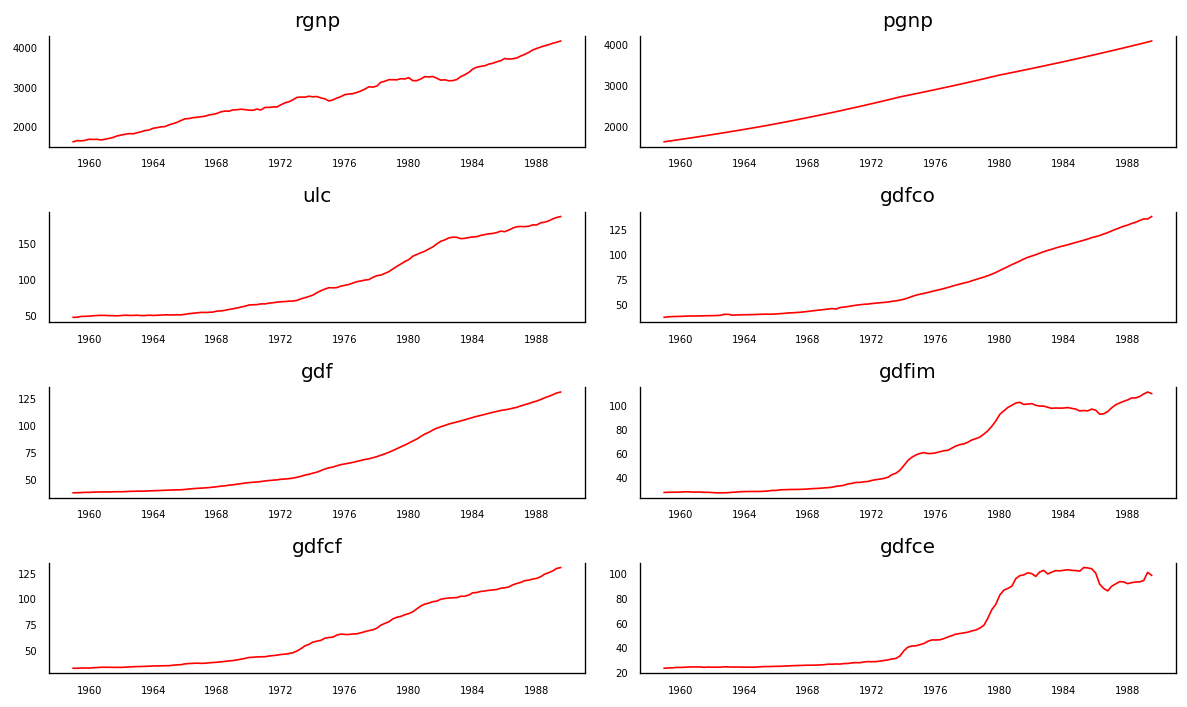

In [ ]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

So what does Granger’s Causality really test?

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series ($X$) do not cause the other series ($Y$). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


So how to read the above output?

The row are the Response ($Y$) and the columns are the predictor series ($X$). 

* For example, if you take the value $0.0003$ in (row 1, column 2), it refers to the $p-value$ of `pgnp_x` causing `rgnp_y`. 

* Whereas, the $0.000$ in (row 2, column 1) refers to the $p-value$ of `rgnp_y` causing `pgnp_x`.

So, how to interpret the p-values?

If a given $p-value$ is < significance level $(0.05)$, then, the corresponding $X$ series (column) causes the $Y$ (row).

* For example, $p-value$ of $0.0003$ at (row 1, column 2) represents the p-value of the Grangers Causality test for `pgnp_x` causing `rgnp_y`, which is less that the significance level of $0.05$.

So, you can reject the null hypothesis and conclude `pgnp_x` causes `rgnp_y`.

Looking at the $p-values$ in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, let’s do the Cointegration test.

## 3. Cointegration test

**Definition**

> **Cointegration test** helps to establish the presence of a statistically significant connection between two or more time series.

But, what does Cointegration mean?

To understand that, we first need to know what is ‘order of integration’ (d).

Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

Now, when you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

Soren Johanssen in his paper (1991) devised a procedure to implement the cointegration test.

It is fairly straightforward to implement in Python `statsmodels`, as you can see below.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


**Training and Testing Data**

The VAR model will be fitted on `df_train` and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics, as seen later in this article.

In [ ]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(119, 8)
(4, 8)


## 3. Stationarity

Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.

Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

There is a suite of tests called unit-root tests. The popular ones are:

* Augmented Dickey-Fuller Test (ADF Test)

* KPSS test

* Philip-Perron test

Let’s use the ADF test for our purpose.

By the way, if a series is found to be non-stationary, you make it stationary by differencing the series once and repeat the test again until it becomes stationary.

Since, differencing reduces the length of the series by 1 and since all the time series has to be of the same length, you need to difference all the series in the system if you choose to difference at all.
Got it?

Let’s implement the ADF Test.

First, we implement a nice function (`adfuller_test()`) that writes out the results of the `ADF` test for any given time series and implement this function on each series one-by-one.

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

**ADF Test on each column**

In [ ]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.5428
 No. Lags Chosen       = 2
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9861. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1556
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.9957. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. N

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

**1st difference**

In [ ]:
df_differenced = df_train.diff().dropna()

Re-run ADF test on each differenced series.

**ADF Test on each column of 1st Differences Dataframe**

In [ ]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3448
 No. Lags Chosen       = 1
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8282
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.3666. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

After the first difference, Real Wages (Manufacturing) is still not stationary. It’s critical value is between 5% and 10% significance level.

All of the series in the VAR model should have the same number of observations.
So, we are left with one of two choices.

That is, either proceed with 1st differenced series or difference all the series one more time.

**Second Differencing**


In [ ]:
df_differenced = df_differenced.diff().dropna()

Re-run ADF test again on each second differenced series.

**ADF Test on each column of 2nd Differences Dataframe**

In [ ]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0123
 No. Lags Chosen       = 2
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pgnp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.9813
 No. Lags Chosen       = 0
 Critical value 1%     = -3.488
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ulc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

## 4. Selecting the order $p$

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [ ]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Lag Order = 1
AIC :  -1.3679402315450677
BIC :  0.34118471465888245
FPE :  0.2552682517347194
HQIC:  -0.6741331335699567 

Lag Order = 2
AIC :  -1.621237394447823
BIC :  1.6249432095295857
FPE :  0.2011349437137141
HQIC:  -0.3036288826795914 

Lag Order = 3
AIC :  -1.7658008387012782
BIC :  3.034547316376784
FPE :  0.18125103746164378
HQIC:  0.18239143783963385 

Lag Order = 4
AIC :  -2.0007351644703126
BIC :  4.371215137654093
FPE :  0.1555696652148118
HQIC:  0.5849359332771122 

Lag Order = 5
AIC :  -1.961953560836398
BIC :  5.999364562242093
FPE :  0.18692794389114836
HQIC:  1.2682063311783303 

Lag Order = 6
AIC :  -2.3303386524829035
BIC :  7.238452689088582
FPE :  0.16380374017443694
HQIC:  1.551437166954809 

Lag Order = 7
AIC :  -2.5923313523471254
BIC :  8.602387254937799
FPE :  0.18238685837154206
HQIC:  1.9483069621146587 

Lag Order = 8
AIC :  -3.317261976458207
BIC :  9.522195810323028
FPE :  0.1557316324820906
HQIC:  1.8896071386220967 

Lag Order = 9
AIC :  -4.8047631259

In the above output, the AIC drops to lowest at lag 4, then increases at lag 5 and then continuously drops further.
Let’s go with the lag 4 model.

An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.

The selected order(p) is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-0.07898,0.1232,0.9241,0.002961
1,-0.5721,1.248,0.5662,0.1653
2,-0.8256,2.612,0.4482,0.5674
3,-1.007,4.048,0.3937,1.042
4,-1.255,5.418,0.3399,1.449
5,-1.230,7.060,0.4147,2.129
6,-1.739,8.169,0.3286,2.276
7,-2.142,9.384,0.3340,2.528
8,-2.964,10.18,0.2744,2.362
9,-4.562,10.20,0.1413,1.420


According to FPE and HQIC, the optimal lag is observed at a lag order of 3.

We, however, don’t have an explanation for why the observed AIC and BIC values differ when using result.aic versus as seen using model.select_order().

Since the explicitly computed AIC is the lowest at lag 4, I choose the selected order as 4.

**Model training**

In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Sep, 2022
Time:                     02:10:11
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    4.37122
Nobs:                     113.000    HQIC:                  0.584936
Log likelihood:          -905.679    FPE:                   0.155570
AIC:                     -2.00074    Det(Omega_mle):       0.0200322
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.430021         2.677505            0.908           0.364
L1.rgnp         -0.750066         0.159023           -4.717           0.000
L1.pgnp         -0.095621         4.938865           -0.019           0.985
L1.ul

**Serial Correlation of Residuals**

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

What does this mean to us?
If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

Alright, coming back to topic.

A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

> $DW = \frac{\sum_{t=1}^T(\varepsilon_t - \varepsilon_{t-1})^2}{\sum_{t=1}^T\varepsilon_t^2}.$

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

NameError: ignored

## 4. Forecasting

In order to forecast, the VAR model expects up to the lag order number of observations from the past data.

This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 13.5,   0.1,   1.4,   0.1,   0.1,  -0.1,   0.4,  -2. ],
       [-23.6,   0.2,  -2. ,  -0.5,  -0.1,  -0.2,  -0.3,  -1.2],
       [ -3.3,   0.1,   3.1,   0.5,   0.3,   0.4,   0.9,   2.2],
       [ -3.9,   0.2,  -2.1,  -0.4,   0.2,  -1.5,   0.9,  -0.3]])

**The forecasting**

In [ ]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1988-10-01,48.322456,1.250774,0.595993,0.265657,-0.104146,0.304119,-0.917227,-0.113061
1989-01-01,-34.962286,-0.387966,-0.329877,-0.042217,0.164633,1.357223,0.618163,3.029975
1989-04-01,20.392680,0.291298,0.390812,-0.134488,-0.486073,-0.149551,-1.238234,-2.345223
1989-07-01,-37.416599,-0.280943,0.367912,0.102797,0.333371,-0.502103,0.469468,0.517424


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In this case it is two times.

## 5. Inversion

**Invert the transformation to get the real forecast**

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc



In [ ]:
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

NameError: ignored

The forecasts are back to the original scale. Let’s plot the forecasts against the actuals from test data.

**Plot of Forecast vs Actuals**

NameError: ignored

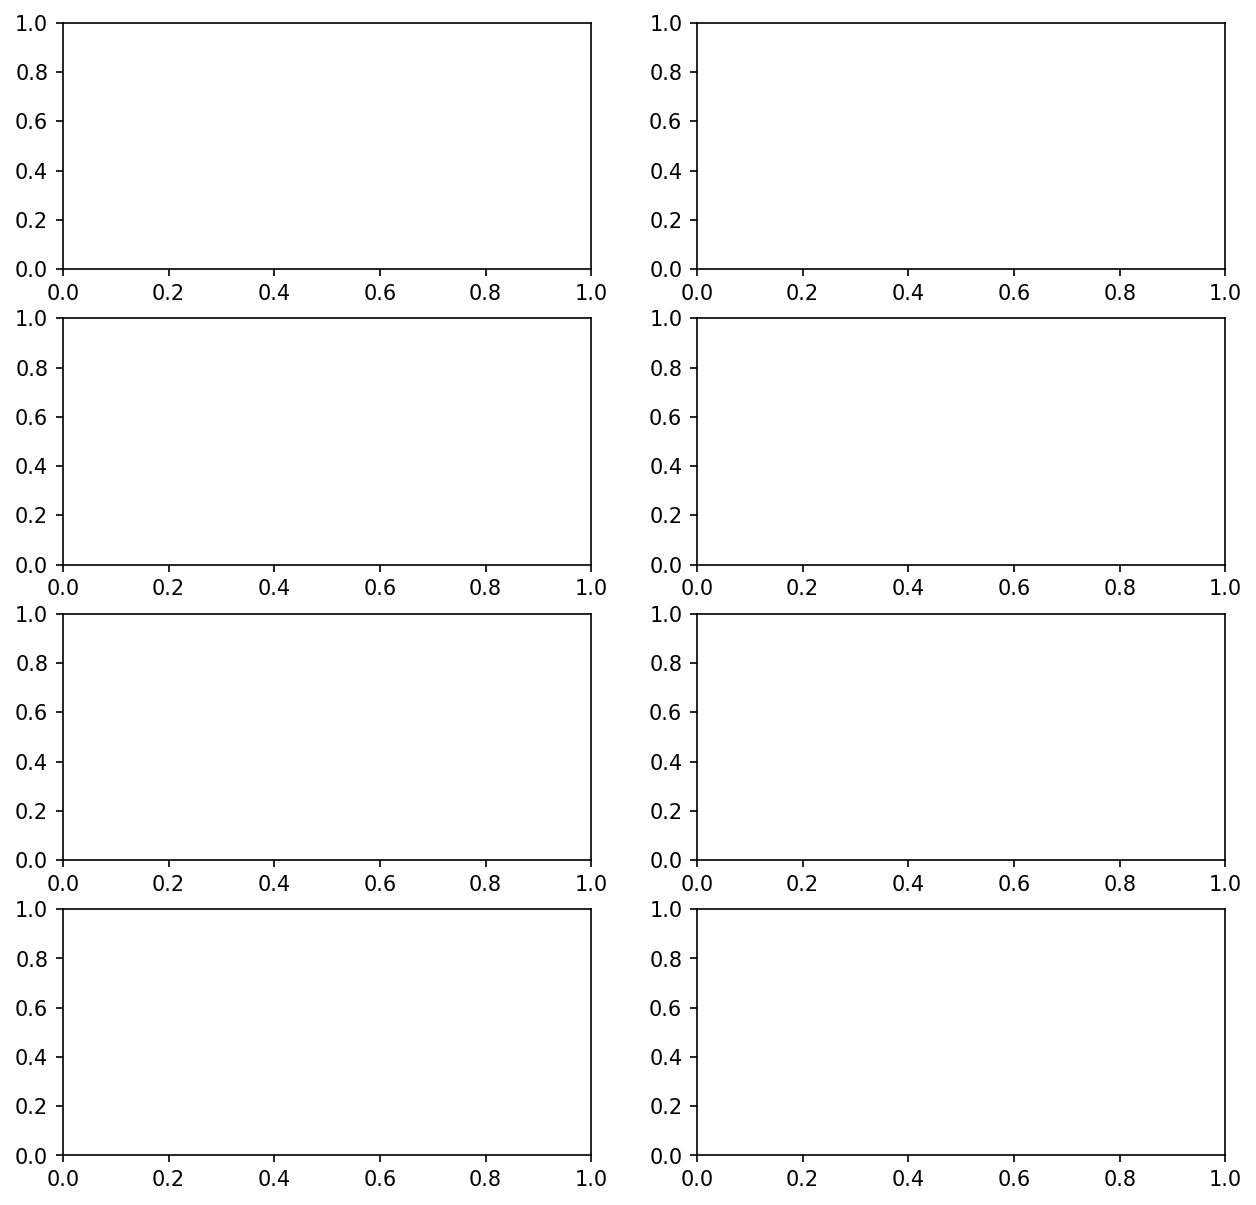

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

**Evaluate the Forecasts**

To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: rgnp


NameError: ignored